#UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

- Marketing is crucial for the growth and sustainability of retail business
- One of the key pain points for marketers is to know their customers and identify their needs.
- if data about the customers is avaliable, data science and AI/ML can be applied to perform market segmentation

- In this case study, you have been hired as  an expert data scientist for a retail analytics company in Seattle,
- The company has extensive data on their customers for the duration of 2.5 years.
- you have been tasked to create targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups

---
- ORDERNUMBER: identification of order placed
- QUANTITYORDERED: Number of items ordered
- PRICEEACH: Price of each item
- SALES: Total amount of sales
- ORDERDATE: Date in which order is placed
- STATUS: Status of the order
- QTR_ID: Quarter in which order is placed
- MONTH_ID: Month in which order is placed
- YEAR_ID: Year in which order is placed
- PRODUCTLINE: Product category
- CUSTOMERNAME: Name of the customer
- PHONE: Phone number
- ADDRESSLINE1: Address to be shipped
- CITY: City in which customer resides
- STATE: State in which customer resides
- POSTALCODE: Postal code in which customer resides
- COUNTRY: Country in which customer resides
- CONTACTFIRSTNAME: Contact person's first name
- CONTACTLAST NAME: Contact person's last name

#IMPORT DATASET AND LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Navigate to My Drive directory to store the dataset
%cd /content/drive/My Drive/AIMarketing


/content/drive/My Drive/AIMarketing


In [ ]:
sales_df = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')
#MSRP is the manufacturer's suggested retail price (MSRP) or sticker price represents the suggested retail price of products
#MSRP is used to standardize the price of producys over multiple company store locations

In [ ]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
#lets view the types of data
sales_df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,object
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
#convert order date into date time using pandas
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

#check the type of data
sales_df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,datetime64[ns]
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [ ]:
#how many null elements exist in 'ADDRESSLINE2'?
sales_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
sales_df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
#since there are lot of null values in 'addressline2, state, postalcode, teritory. We can drop them
#Country would represent the order geographical information
#also we can drop city, address1, phone number, contact_name, contact last_name and contact first_name, they are not required for the analysis
df_drop = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'CITY', 'ADDRESSLINE1', 'PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME']
sales_df = sales_df.drop(df_drop, axis=1)
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,France,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,France,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,USA,Medium


In [ ]:
sales_df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [ ]:
#obtain the number of unique values in each column
sales_df.nunique()

,0
ORDERNUMBER,307
QUANTITYORDERED,58
PRICEEACH,1016
ORDERLINENUMBER,18
SALES,2763
ORDERDATE,252
STATUS,6
QTR_ID,4
MONTH_ID,12
YEAR_ID,3


#PERFORM EXPLORATORY DATA ANALYSIS AND DATA CLEANING - PART 1

In [ ]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object', name='COUNTRY')

In [ ]:
sales_df['COUNTRY'].value_counts()

,count
COUNTRY,
USA,1004
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79


In [ ]:
#Function to visualize the count of items in a given column
#Plotly is a python graphing library that makes interactive
#plotly_express is a high-leven wrapper around plotly for rapid data exploration and figure generation

def barplot_visualization(x):
  fig = plt.Figure(figsize = (12,6))
  fig = px.bar(x = sales_df[x].value_counts().index, y = sales_df[x].value_counts(), color = sales_df[x].value_counts().index, height = 600)
  fig.show()

In [ ]:
#let's call this function for any given column such as 'country'
barplot_visualization('COUNTRY')

In [ ]:
#unbalanced dataset
#how many unique order status values do we have?

barplot_visualization('STATUS')

In [ ]:
sales_df.drop(columns = ['STATUS'], inplace = True)
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,Small
1,10121,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,France,Small
2,10134,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,France,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Spain,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Finland,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Spain,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,Alpha Cognac,France,Small


In [ ]:
barplot_visualization('PRODUCTLINE')

In [ ]:
barplot_visualization('DEALSIZE')

In [ ]:
#function to add dummy variables to replace categorical variables
#transform categorical data in 0, 1
def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns = x, inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [ ]:
#lets obtain dummy variables for the column 'country'
sales_df = dummies('COUNTRY')
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,10107,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,...,False,False,False,False,False,False,False,False,False,True
1,10121,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,...,False,False,False,False,False,False,False,False,False,False
2,10134,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,...,False,False,False,False,False,False,False,False,False,False
3,10145,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,...,False,False,False,False,False,False,False,False,False,True
4,10159,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,...,False,False,False,False,False,True,False,False,False,False
2819,10373,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,...,False,False,False,False,False,False,False,False,False,False
2820,10386,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,...,False,False,False,False,False,True,False,False,False,False
2821,10397,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

print(sales_df.columns)



Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'DEALSIZE', 'Australia',
       'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
       'Germany', 'Ireland', 'Italy', 'Japan', 'Norway', 'Philippines',
       'Singapore', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USA'],
      dtype='object')


In [ ]:
# Identificar as colunas booleanas
boolean_columns = sales_df.select_dtypes(include=['bool']).columns

# Converter os valores booleanos para inteiros (0 e 1) e sobrescrever no DataFrame
sales_df[boolean_columns] = sales_df[boolean_columns].astype(int)

# Verificar o resultado para garantir que foi alterado
print(sales_df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  ...  Italy Japan Norway  \
0 2003-02-24       1         2     2003  Motorcycles  ...      0     0      0   
1 2003-05-07       2         5     2003  Motorcycles  ...      0     0      0   
2 2003-07-01       3         7     2003  Motorcycles  ...      0     0      0   
3 2003-08-25       3         8     2003  Motorcycles  ...      0     0      0   
4 2003-10-10       4        10     2003  Motorcycles  ...      0     0      0   

  Philippines  Singapore  Spain  Sweden  Switzerland  UK  USA  
0           0   

In [ ]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,10107,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,...,0,0,0,0,0,0,0,0,0,0
2,10134,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,...,0,0,0,0,0,0,0,0,0,0
3,10145,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,...,0,0,0,0,0,0,0,0,0,1
4,10159,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,...,0,0,0,0,0,1,0,0,0,0
2819,10373,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,...,0,0,0,0,0,0,0,0,0,0
2820,10386,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,...,0,0,0,0,0,1,0,0,0,0
2821,10397,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sales_df = dummies('PRODUCTLINE')

In [ ]:
sales_df = dummies('DEALSIZE')
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,10107,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,...,False,True,False,False,False,False,False,False,False,True
1,10121,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,...,False,True,False,False,False,False,False,False,False,True
2,10134,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,...,False,True,False,False,False,False,False,False,True,False
3,10145,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,...,False,True,False,False,False,False,False,False,True,False
4,10159,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,...,False,False,False,True,False,False,False,False,False,True
2819,10373,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,...,False,False,False,True,False,False,False,False,True,False
2820,10386,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,...,False,False,False,True,False,False,False,False,True,False
2821,10397,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,10107,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,...,False,True,False,False,False,False,False,False,False,True
1,10121,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,...,False,True,False,False,False,False,False,False,False,True
2,10134,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,...,False,True,False,False,False,False,False,False,True,False
3,10145,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,...,False,True,False,False,False,False,False,False,True,False
4,10159,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,...,False,False,False,True,False,False,False,False,False,True
2819,10373,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,...,False,False,False,True,False,False,False,False,True,False
2820,10386,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,...,False,False,False,True,False,False,False,False,True,False
2821,10397,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
y = pd.Categorical(sales_df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [ ]:
y = pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [ ]:
#Since the number unique product code  is 109, if we add one-hot variables there
#would be additional 109 columns, we can avoid that by using categorical encoding
#This is not the optimal way of dealing with it but its important to avoid curse of dimensionality
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,10107,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,...,False,True,False,False,False,False,False,False,False,True
1,10121,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,...,False,True,False,False,False,False,False,False,False,True
2,10134,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,...,False,True,False,False,False,False,False,False,True,False
3,10145,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,...,False,True,False,False,False,False,False,False,True,False
4,10159,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,...,False,False,False,True,False,False,False,False,False,True
2819,10373,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,...,False,False,False,True,False,False,False,False,True,False
2820,10386,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,...,False,False,False,True,False,False,False,False,True,False
2821,10397,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,...,False,False,False,True,False,False,False,False,False,True


#PERFORM EXPLORATORY DATA ANALYSIS AND DATA CLEANING - PART 2

In [ ]:
#Group data by order date
sales_df_group = sales_df.groupby('ORDERDATE').sum()
sales_df_group

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,40400,151,288.78,10,12133.25,4,4,8012,363,174,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,40404,142,284.96,10,11432.34,4,4,8012,372,181,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,20204,80,150.14,3,6864.05,2,2,4006,155,37,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,161648,541,1417.54,136,54702.00,16,16,32048,1695,723,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,131352,443,1061.89,91,44621.96,13,13,26039,1365,720,...,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,62502,259,561.18,21,31821.90,12,30,12030,728,101,...,0,6,0,0,0,0,0,2,3,1
2005-05-17,145866,509,1269.43,105,59475.10,28,70,28070,1669,462,...,14,0,0,0,0,0,0,2,8,4
2005-05-29,156302,607,1148.40,94,51233.18,30,75,30075,1328,797,...,7,0,0,0,0,0,8,0,8,7


In [ ]:
#When does the sales generally peak (which month)?
fig = px.line(x = sales_df_group.index, y = sales_df_group.SALES, title =  'Sales')
fig.show()

In [ ]:
#we can drop 'orderdate' and keep the rest of the date-related data such as 'month'
sales_df.drop("ORDERDATE", axis = 1, inplace = True)
sales_df.shape

(2823, 40)

<Axes: >

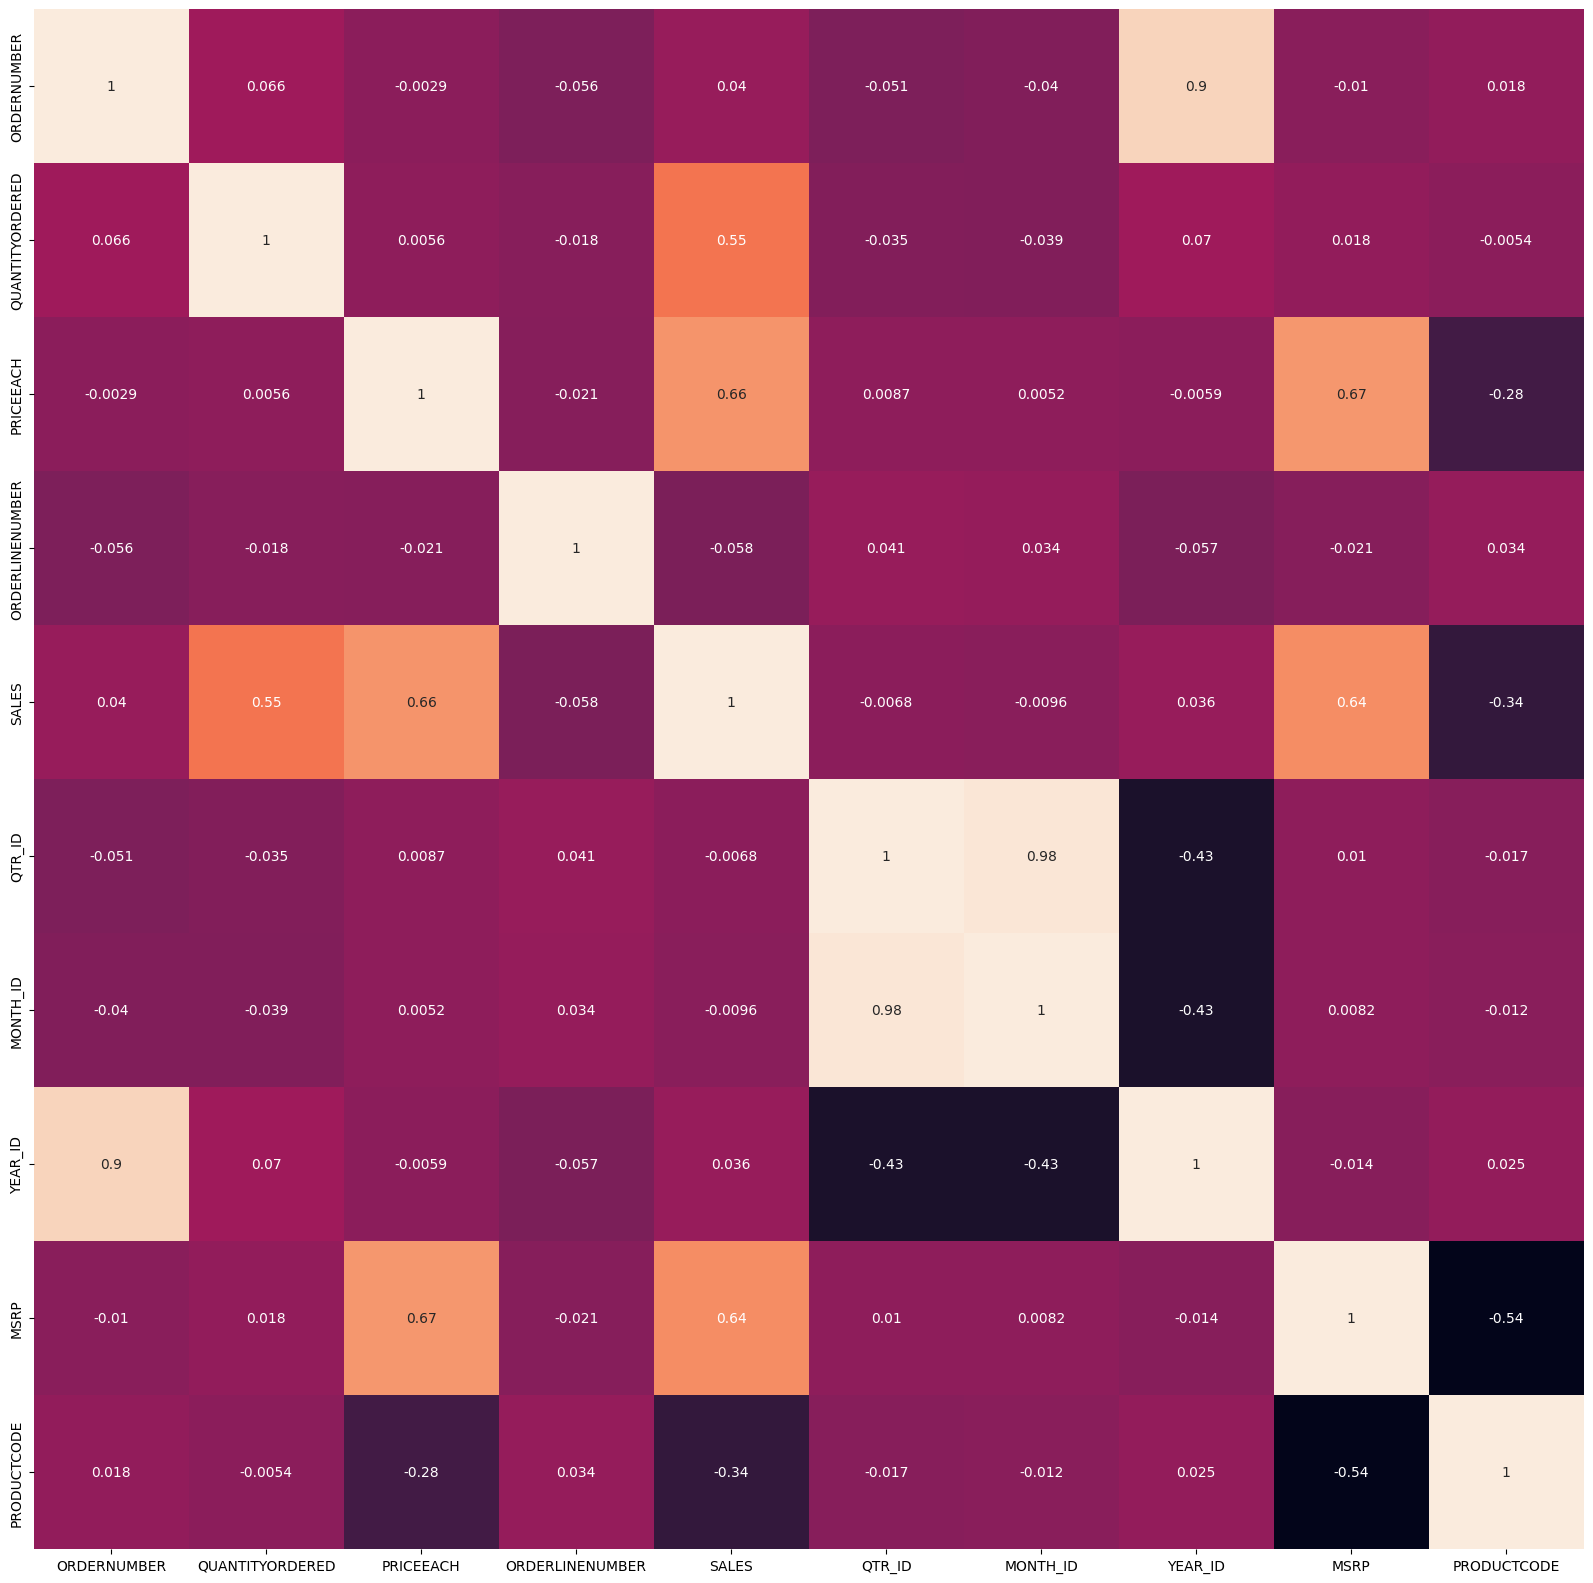

In [ ]:
plt.figure(figsize = (20,20))
corr_matrix = sales_df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)
#

In [ ]:
#it looks like the quarter ID and the monthly IDs are highly correlated
#the code identifies and removes the qtr_id column because it carries largely the same information as the month_id
#lets drop 'qtr_id' or month_id
sales_df.drop("QTR_ID", axis = 1, inplace = True)
sales_df.shape

(2823, 39)

In [ ]:
#lets plot distplots
#distplot show the (1) histogram, (2) kde plot and (3) rug plot.
#(1) Histogram: it's a graphical display of data using bars with various heights
#(2) Kde plot: Kernel Density Estimate is used for visualizing the probability density of a continuous variable
#(3) Rug plot: plot of data for a single quantitative variable, displayed as marks along an axis (onde-dimensional scatter plot)

import plotly.figure_factory as ff

plt.figure(figsize =  (10, 10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = sales_df.columns[i])
    fig.show()

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#visualize the relationship between variables using pairplots
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df,
                        dimensions = sales_df.columns[:8], color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    height = 1100,
    width = 1100
)
fig.show()

#a trend exists between 'SALES' and 'QUANTITYORDERED'
#a trend exists between 'MSRP' and 'PRICEEACH'
#a trend exists between 'PRICEEACH' and 'SALES'
#it seems that sales growth exists as we move from 2013 to 2014 to 2015('SALES' vs 'YEAR_ID')
#zoom in into 'SALES' and 'QUANTITYORDERED', you will be able to see the monthly information color coded on the graph

<Figure size 1500x1500 with 0 Axes>

#UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING

- K- means INTUITION
- K MEANS is an unsupervised learning algorithm(clustering)
- works by grouping some data points together (clustering) in an unsupervised fashion
- The algorithm groups observations with similar attribute values together by measuring the euclidian ditance between points]

steps:

- choose number of clusters 'k'
- select random k points that are going to be the centroids for each cluster
- assign each data point to the nearest centroid, doing so will enable us to create "k" number of clusters
- calculate a new centroid for each cluster
- reassign each data point to the new closest centroid
- go to step 4 and repeat

#FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- the elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset
- if the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best

StandardScaler is used to stardardize the sales data before applying a clustering algorithm.
This will help the algorithm find groups of customers with similar characteristics more efficiently

In [ ]:
# Convert all columns except 'CUSTOMERNAME' to numeric
for col in sales_df.columns:
    if col != 'CUSTOMERNAME':  # Exclude 'CUSTOMERNAME' column
        try:
            sales_df[col] = pd.to_numeric(sales_df[col])
        except ValueError:
            print(f"Warning: Could not convert column '{col}' to numeric. Check for non-numeric values.")

# Now, proceed with scaling
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df.drop(columns=['CUSTOMERNAME'])) # Exclude 'CUSTOMERNAME'

In [ ]:
sales_df_scaled.shape

(2823, 38)

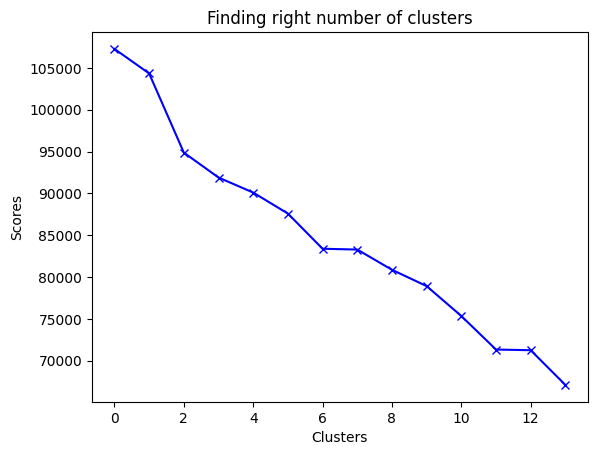

In [ ]:
scores = []
range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(sales_df_scaled)
  scores.append(kmeans.inertia_) #inertia is the sum of squared distances of samples to their closest cluster center

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

  #from this we can observe that, 5th cluster seems to be forming the elbow curve
  #note that curve will change everytime we run the cell


#APPLY K-MEANS METHOD


In [ ]:
#cluster the data using k-means
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([3, 3, 1, ..., 1, 4, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(5, 38)

In [ ]:
#lets take a look at the cluster centers
# Exclude 'CUSTOMERNAME' column from the DataFrame used for clustering
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = sales_df.drop(columns=['CUSTOMERNAME']).columns)
cluster_centers

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,-0.005378,0.081507,0.199054,-0.057475,0.110670,0.070445,-0.031102,0.047563,-0.105763,0.004581,...,-0.721812,-0.364452,-0.348674,-0.300637,-0.167454,2.894605,-0.523371,-0.140858,0.186185,-0.122102
1,0.114297,0.474672,0.452553,-0.021227,0.343208,-0.088521,0.139695,-0.054367,0.225201,0.028780,...,-0.482419,0.222717,0.207979,0.212018,0.051515,-0.345470,0.322281,-0.185031,0.993251,-0.912100
2,-0.094126,0.265330,0.741276,-0.032345,1.068369,0.066185,-0.124683,1.212002,-0.818730,-0.085955,...,1.174680,-0.201393,-0.311761,-0.300637,-0.167454,-0.345470,-0.435585,0.758778,0.534338,-0.885760
3,0.006986,-0.479990,-0.698867,0.062316,-0.801795,-0.000106,0.013255,-0.541997,0.278044,0.027094,...,0.269116,0.322368,0.416770,-0.300637,0.258641,-0.340881,-0.523371,-0.242672,-0.980703,1.096370
4,-0.072055,-0.459462,-0.802393,0.020104,-0.841439,0.012397,-0.066045,-0.732854,0.365285,0.022541,...,-0.721812,-0.364452,-0.348674,0.722958,-0.153811,-0.345470,1.218336,-0.242672,-0.980703,1.096370


In [ ]:
#in order to understand what these numbers mean, lets perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
# Get the columns used for scaling (excluding 'CUSTOMERNAME')
columns_used_for_scaling = sales_df.drop(columns=['CUSTOMERNAME']).columns
cluster_centers = pd.DataFrame(cluster_centers, columns=columns_used_for_scaling)
cluster_centers

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,8.791103e+07,3781.171099,37441.750866,144.881590,1.274988e+10,131.264163,4386.162514,169837.902877,52047.955820,0.085833,...,0.505101,0.154973,0.142093,0.105745,0.031719,0.234788,0.303357,0.069586,0.881119,0.777738
1,8.800443e+07,4144.428164,39522.116197,147.615583,1.420211e+10,123.496035,4386.220984,163225.535257,62471.242220,0.086200,...,0.530686,0.174525,0.158818,0.116490,0.032665,0.139532,0.361998,0.069054,0.981945,0.680233
2,8.784177e+07,3951.010529,41891.551387,146.776961,1.873085e+10,131.056001,4386.130478,245377.089170,29593.949003,0.084461,...,0.707788,0.160403,0.143202,0.105745,0.031719,0.139532,0.309445,0.080414,0.924614,0.683484
3,8.792068e+07,3262.387430,30072.873423,153.916694,7.051404e+09,127.816585,4386.177699,131592.120720,64135.451060,0.086174,...,0.611006,0.177844,0.165091,0.105745,0.033560,0.139667,0.303357,0.068360,0.735341,0.928128
4,8.785899e+07,3281.353280,29223.279420,150.732884,6.803821e+09,128.427552,4386.150552,119210.891873,66883.015435,0.086105,...,0.505101,0.154973,0.142093,0.127199,0.031778,0.139532,0.424133,0.068360,0.735341,0.928128


In [ ]:
labels.shape

(2823,)

In [ ]:
labels.max()

4

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

array([4, 4, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
y_kmeans.shape

(2823,)

In [ ]:
#add a label (which cluster) corresponding to each data point
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})], axis = 1)
sale_df_cluster

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,CUSTOMERNAME,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,10107,30,95.70,2,2871.00,2,2003,95,0,Land of Toys Inc.,...,True,False,False,False,False,False,False,False,True,3
1,10121,34,81.35,5,2765.90,5,2003,95,0,Reims Collectables,...,True,False,False,False,False,False,False,False,True,3
2,10134,41,94.74,2,3884.34,7,2003,95,0,Lyon Souveniers,...,True,False,False,False,False,False,False,True,False,1
3,10145,45,83.26,6,3746.70,8,2003,95,0,Toys4GrownUps.com,...,True,False,False,False,False,False,False,True,False,1
4,10159,49,100.00,14,5205.27,10,2003,95,0,Corporate Gift Ideas Co.,...,True,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12,2004,54,108,Euro Shopping Channel,...,False,False,True,False,False,False,False,False,True,4
2819,10373,29,100.00,1,3978.51,1,2005,54,108,"Oulu Toy Supplies, Inc.",...,False,False,True,False,False,False,False,True,False,1
2820,10386,43,100.00,4,5417.57,3,2005,54,108,Euro Shopping Channel,...,False,False,True,False,False,False,False,True,False,1
2821,10397,34,62.24,1,2116.16,3,2005,54,108,Alpha Cognac,...,False,False,True,False,False,False,False,False,True,4


In [ ]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x: float(x))
#convert to float

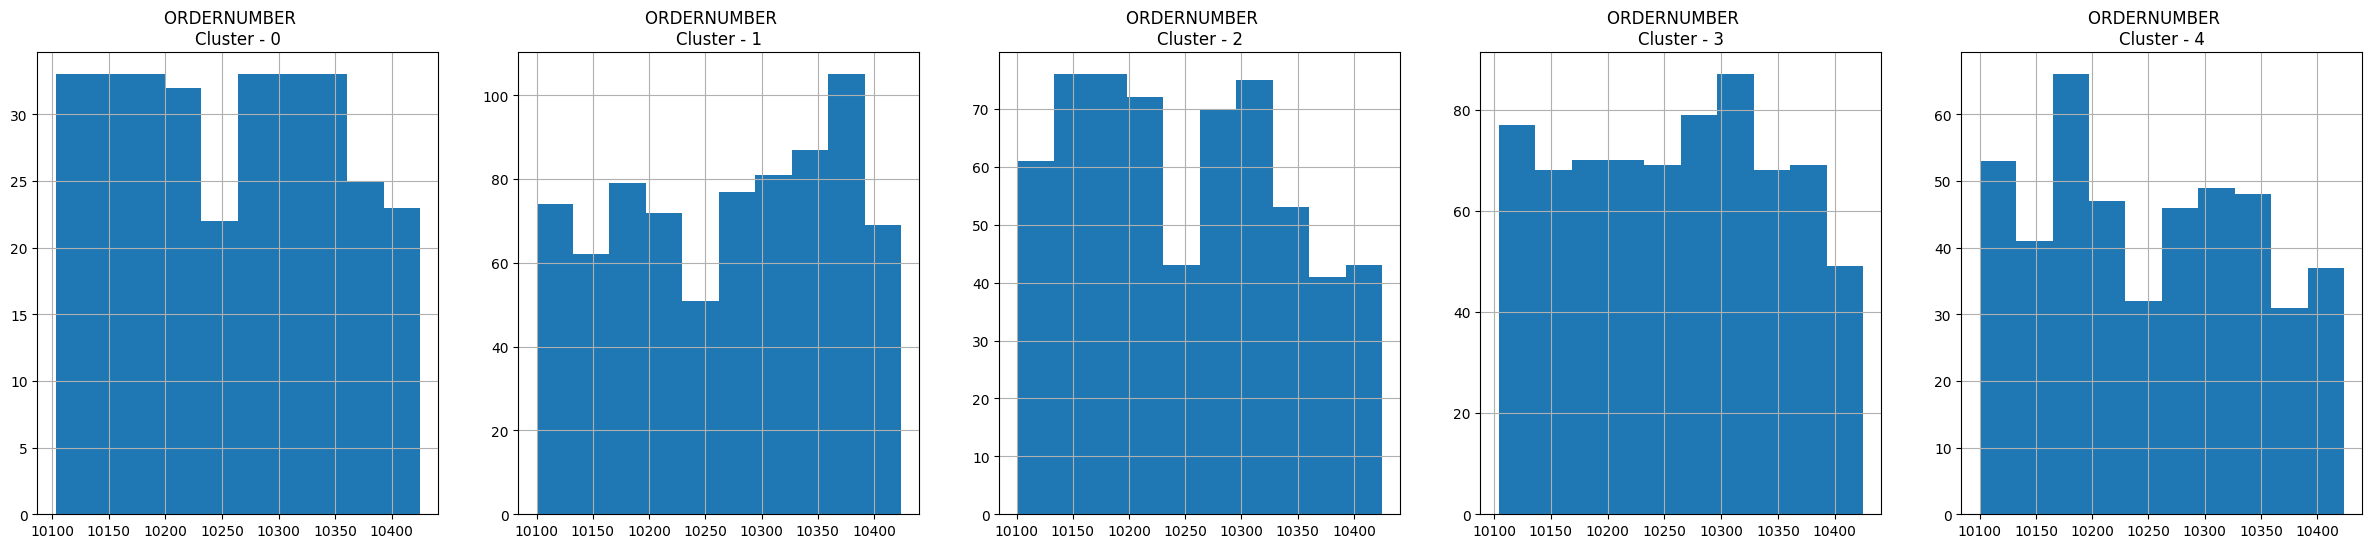

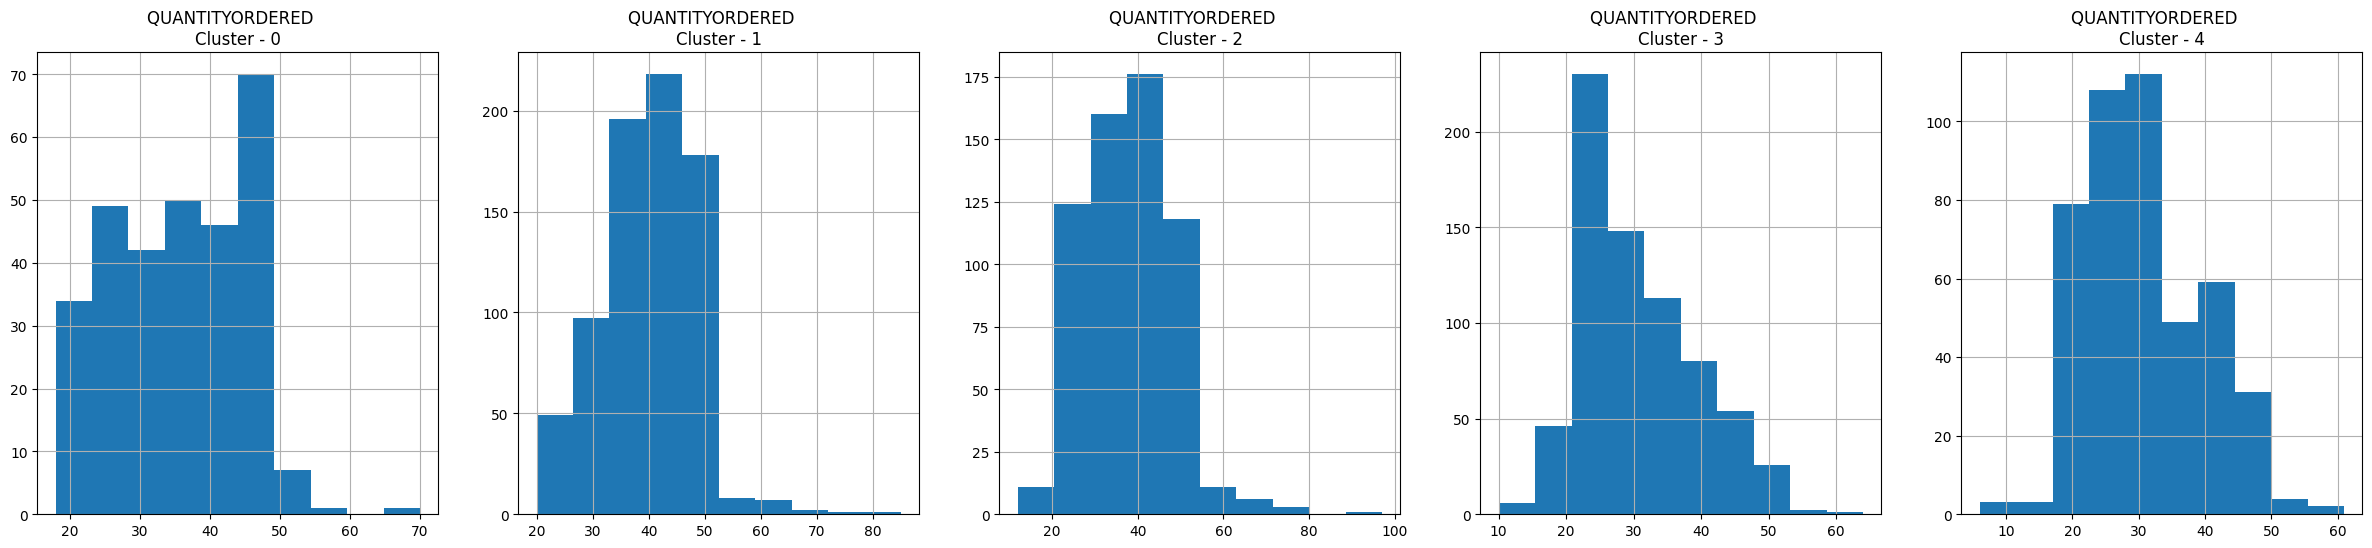

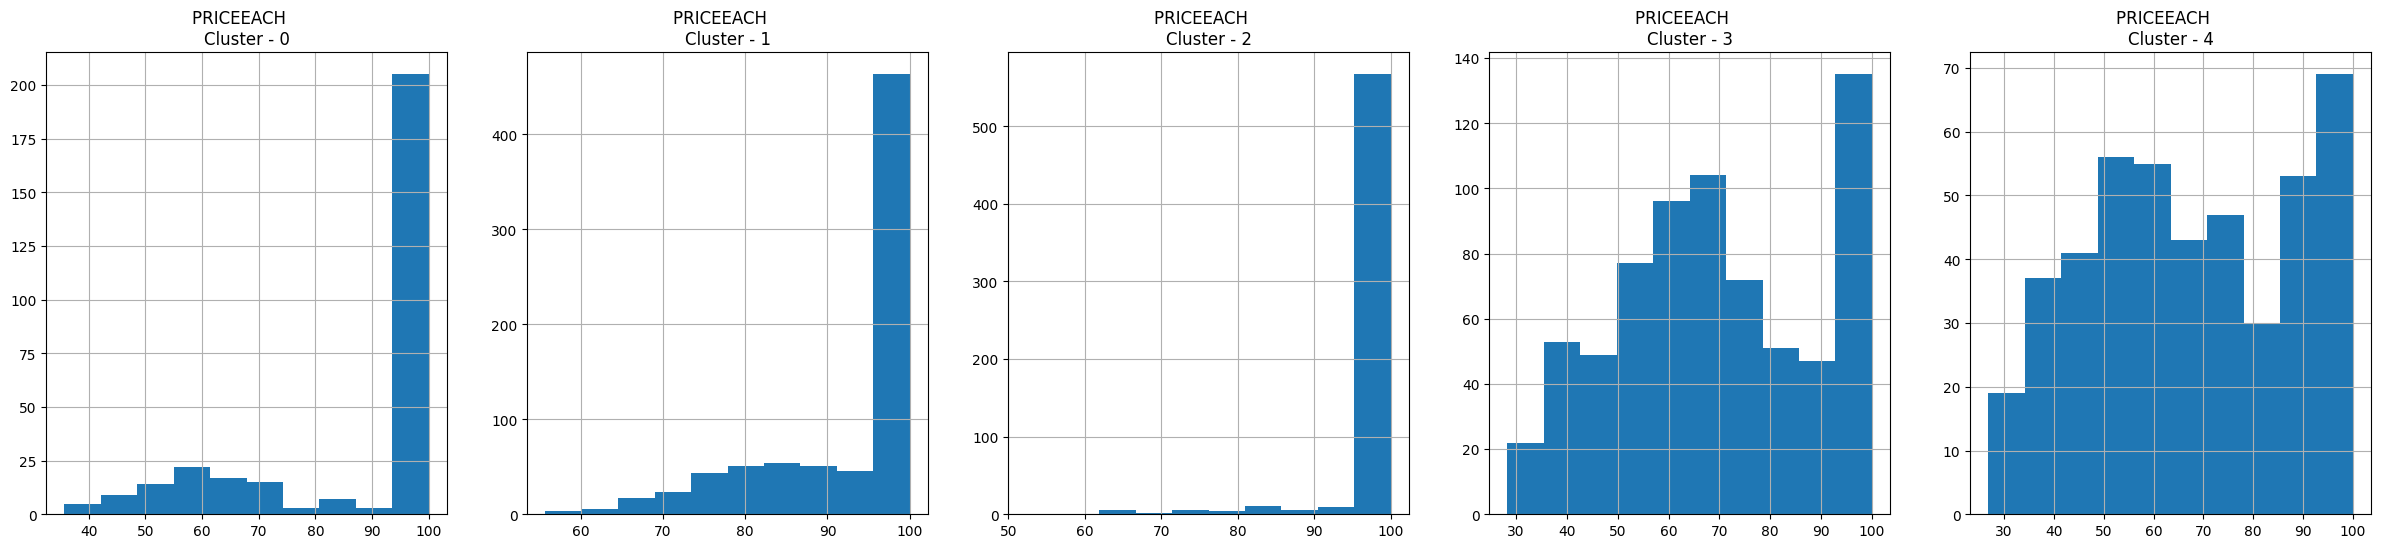

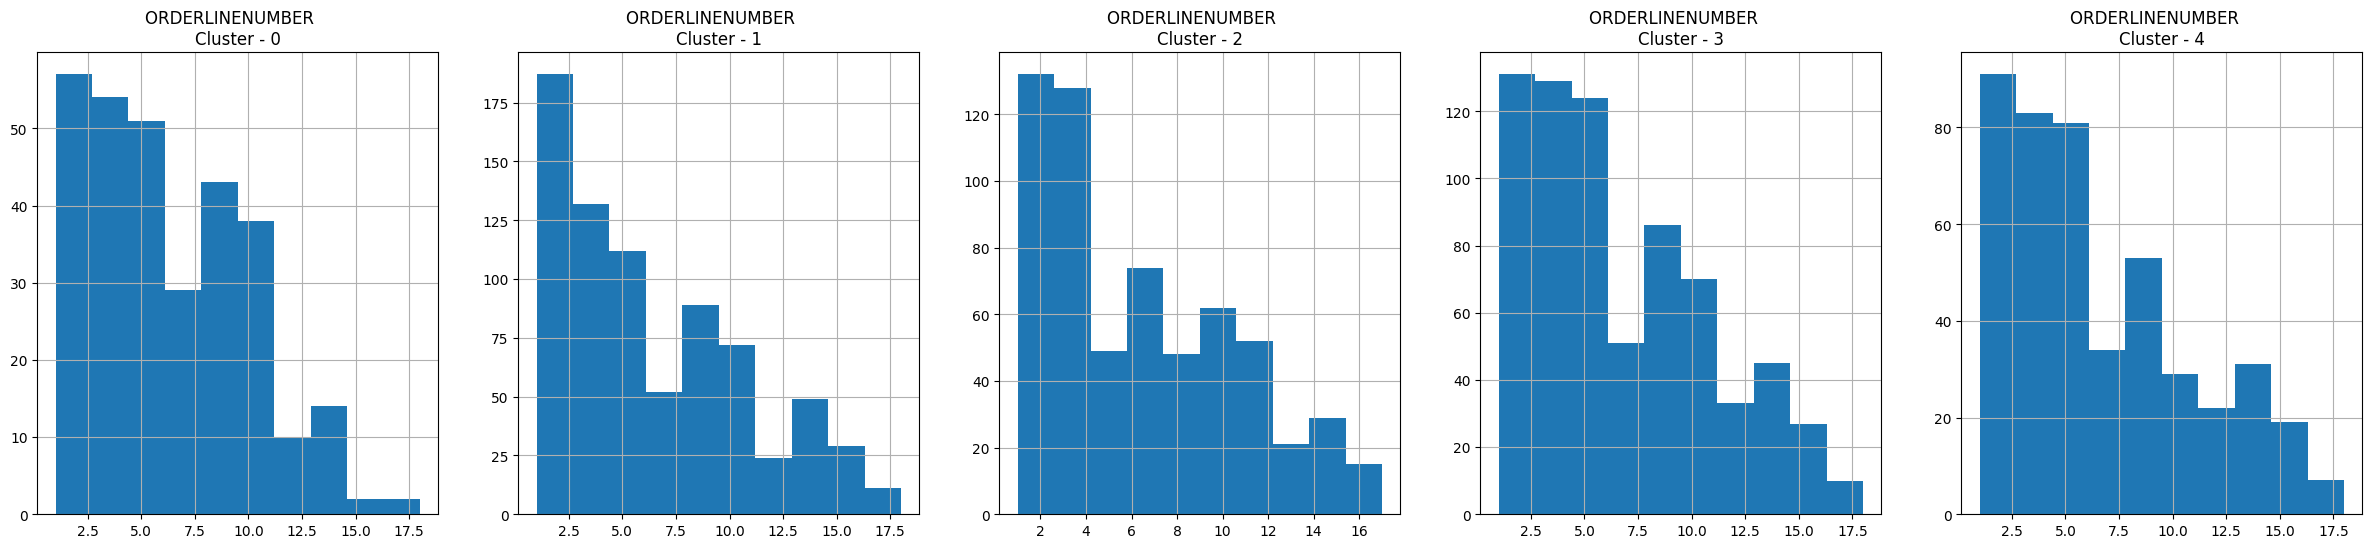

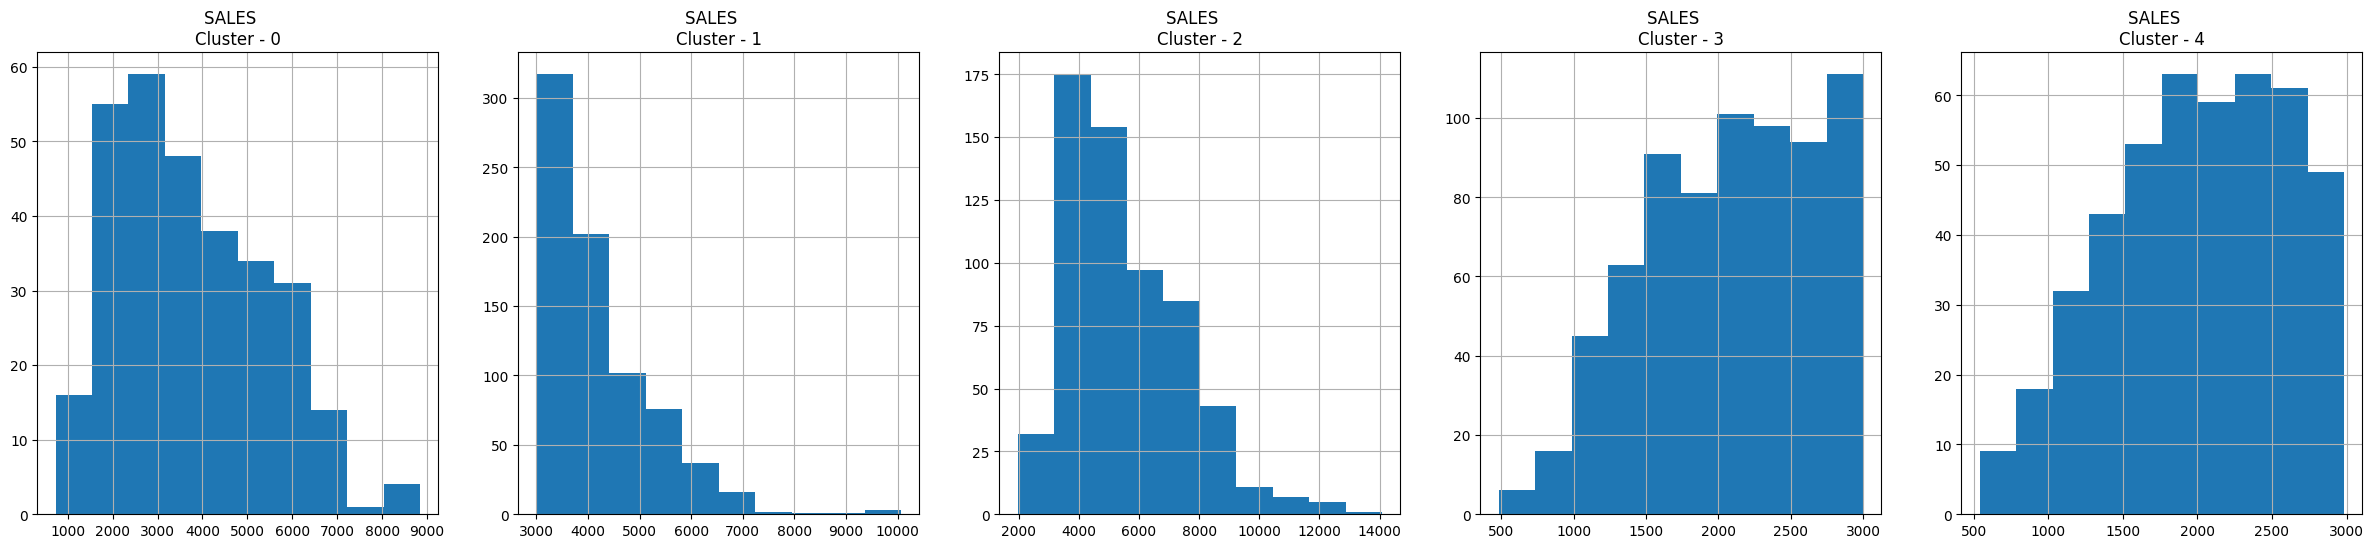

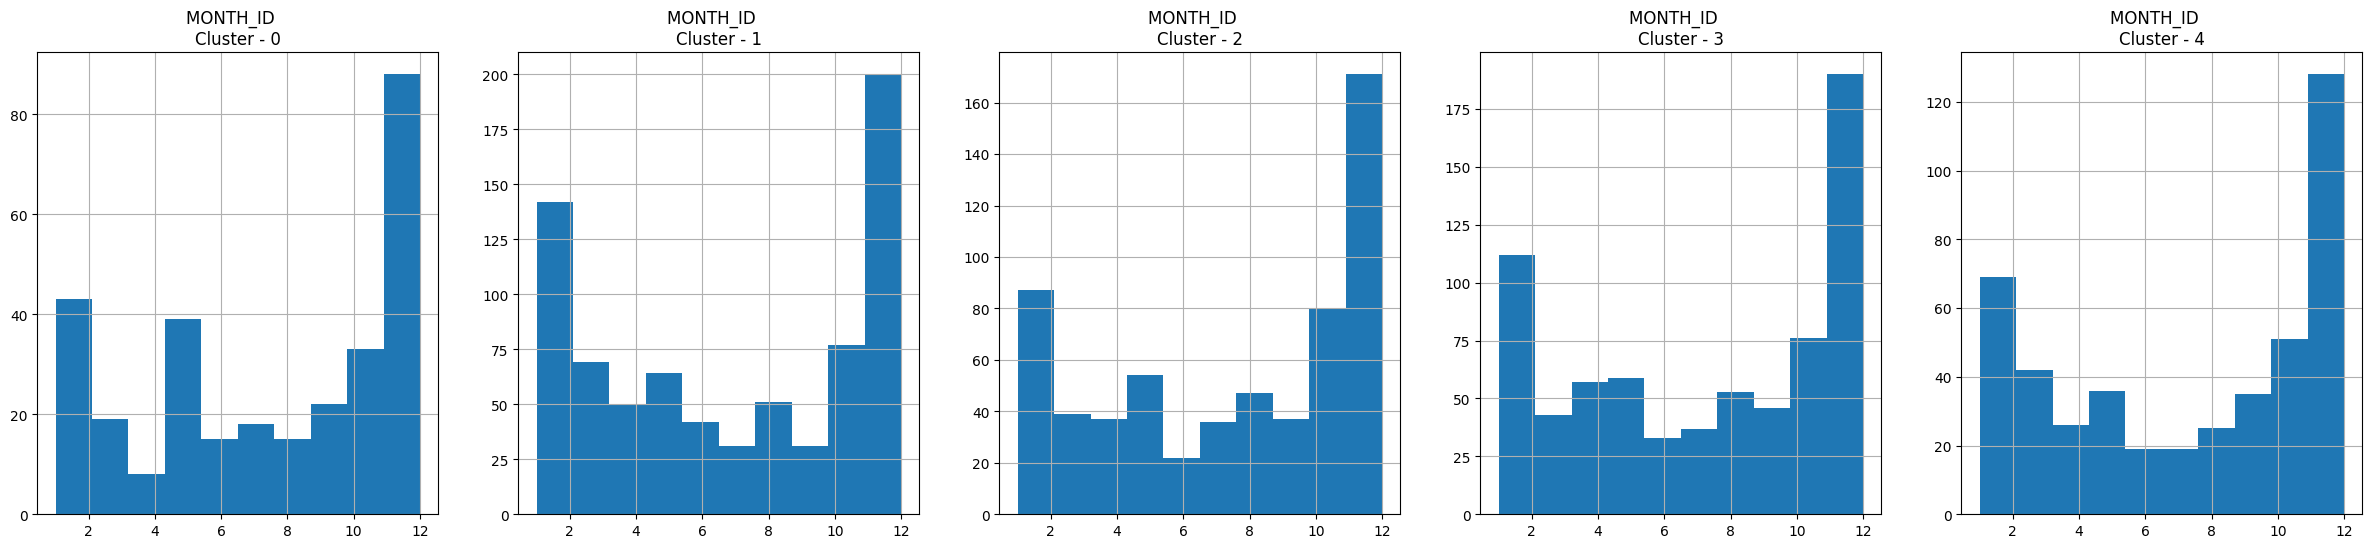

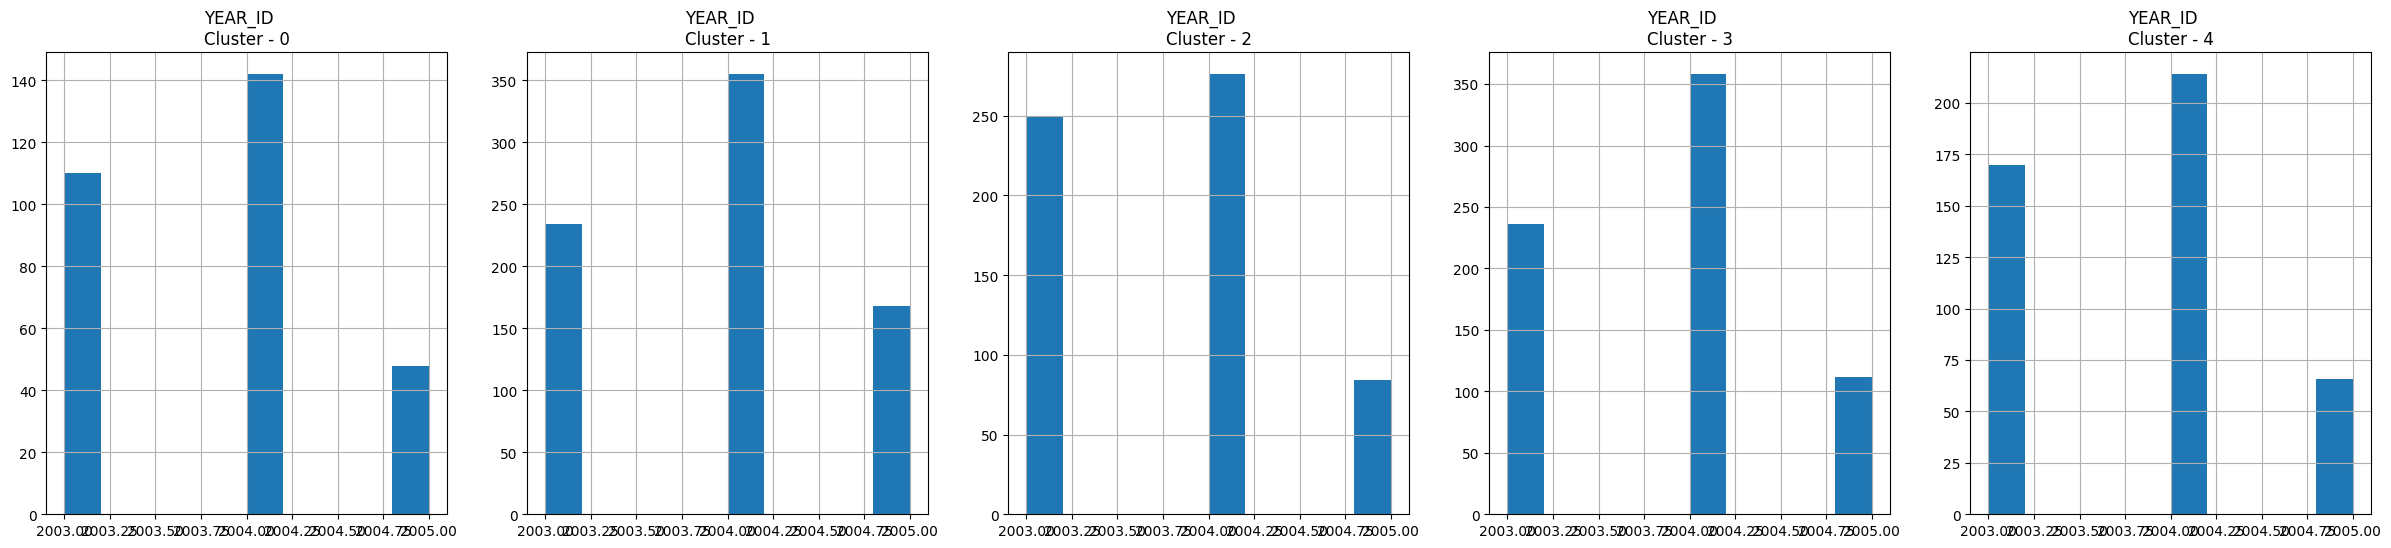

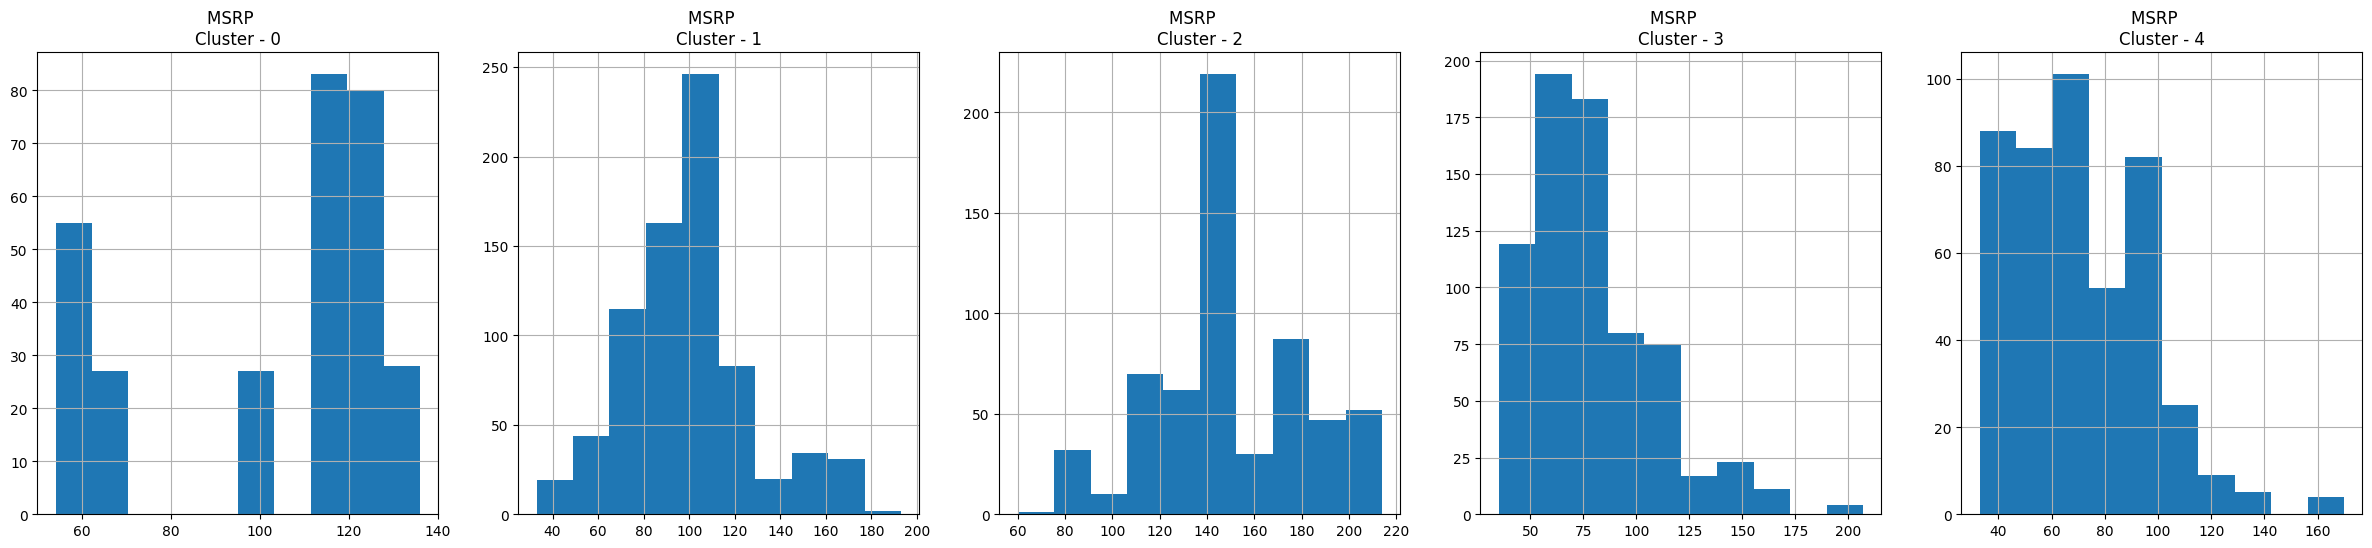

In [ ]:
#plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}   \nCluster - {}'.format(i, j))
  plt.show()

#APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS
- PRINCIPAL COMPONENT ANALYSIS: OVERVIEW
-- PCA is an unsupervised machine learning algorithm
-- PCA performs dimensionality reductions while attempting at keeping the original information unchanged
-- works by trying to fing a new set of features called components
-- components are composites of the uncorrelated given input features

In [ ]:
#Reduce the original data to 3 dimensions using PCA for visualizing the clusters
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.50379261, -1.49084808,  1.23634108],
       [-0.80051347, -1.27531367,  1.31539205],
       [ 1.41678334, -1.13938963, -0.24992246],
       ...,
       [ 0.4089974 ,  3.16748051, -3.02668927],
       [-2.76893017,  3.01417518, -0.73408696],
       [-0.68506439,  2.70185892, -2.66372781]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.503793,-1.490848,1.236341
1,-0.800513,-1.275314,1.315392
2,1.416783,-1.139390,-0.249922
3,1.273902,-1.532390,-0.465628
4,1.962290,-1.667288,-0.820102


In [ ]:
#Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

,pca1,pca2,pca3,cluster
0,-0.503793,-1.490848,1.236341,3
1,-0.800513,-1.275314,1.315392,3
2,1.416783,-1.139390,-0.249922,1
3,1.273902,-1.532390,-0.465628,1
4,1.962290,-1.667288,-0.820102,1
...,...,...,...,...
2818,-2.441171,0.568785,-1.623694,4
2819,-0.140383,3.189940,-2.258388,1
2820,0.408997,3.167481,-3.026689,1
2821,-2.768930,3.014175,-0.734087,4


In [ ]:
#visualize clusters using scatterplot 3d
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3', color = 'cluster', symbol = 'cluster', size_max = 18, opacity = 0.7)

fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.show()

#UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS
- AUTOENCODERS INTUITION
-- used to perform a task of data encoding (representation learning)
-- Auto encoders use thhe same input data for the input and output
-- dimensionality reduction

#APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
sales_df.shape

(2823, 39)

In [ ]:
sales_df.drop('CUSTOMERNAME', axis=1, inplace=True)

In [ ]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,10107,30,95.70,2.0,2871.00,2,2003,95,0,0,...,False,True,False,False,False,False,False,False,False,True
1,10121,34,81.35,5.0,2765.90,5,2003,95,0,0,...,False,True,False,False,False,False,False,False,False,True
2,10134,41,94.74,2.0,3884.34,7,2003,95,0,0,...,False,True,False,False,False,False,False,False,True,False
3,10145,45,83.26,6.0,3746.70,8,2003,95,0,0,...,False,True,False,False,False,False,False,False,True,False
4,10159,49,100.00,14.0,5205.27,10,2003,95,0,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15.0,2244.40,12,2004,54,108,0,...,False,False,False,True,False,False,False,False,False,True
2819,10373,29,100.00,1.0,3978.51,1,2005,54,108,0,...,False,False,False,True,False,False,False,False,True,False
2820,10386,43,100.00,4.0,5417.57,3,2005,54,108,0,...,False,False,False,True,False,False,False,False,True,False
2821,10397,34,62.24,1.0,2116.16,3,2005,54,108,0,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
input_df

<KerasTensor shape=(None, 38), dtype=float32, sparse=False, name=keras_tensor_37>

In [ ]:
# from keras.optimizers import SGD

# Glorot Uniform initializer: https://keras.rstudio.com/reference/initializer_glorot_uniform.html

input_df = Input(shape = (38,))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(38, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Número de features na entrada (38 colunas)
input_dim = 38
encoding_dim = 20  # Dimensão do espaço latente (você pode ajustar esse valor)

# Definindo o modelo
# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Modelo Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Resumo do modelo
autoencoder.summary()


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 20)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 38)                  │             798 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578 (6.16 KB)

 Trainable params: 1,578 (6.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalando os dados
scaler = MinMaxScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

print(sales_df_scaled.shape)  # Deve ser (2823, 38)


(2823, 38)


In [ ]:
autoencoder.fit(sales_df_scaled, sales_df_scaled, batch_size=128, epochs=500, verbose=1)



Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2121   
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1887 
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1595 
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1239 
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0942 
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0778 
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0701 
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0659 
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0626 
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0604 
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0570 
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0545  
Epoch 13/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0520  
Epoch 14/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0499  
Epoch 15/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [ ]:
autoencoder.save_weights('autoencoder_1.weights.h5')

In [ ]:
pred = encoder.predict(sales_df_scaled)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


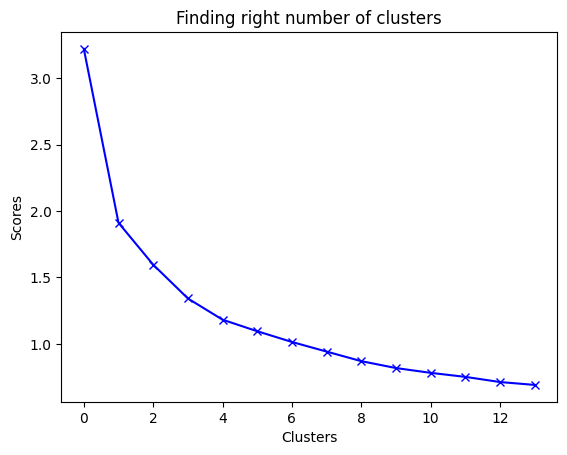

In [ ]:
scores = []
range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()
#find the number of clusters

In [ ]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)
#this code snippet is attempting to cluster the sales data into 3 distinct groups using kmeans


In [ ]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()
#ensure the cluster assigments have been added correctly

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,10107,30,95.70,2.0,2871.00,2,2003,95,0,0,...,True,False,False,False,False,False,False,False,True,1
1,10121,34,81.35,5.0,2765.90,5,2003,95,0,0,...,True,False,False,False,False,False,False,False,True,1
2,10134,41,94.74,2.0,3884.34,7,2003,95,0,0,...,True,False,False,False,False,False,False,True,False,1
3,10145,45,83.26,6.0,3746.70,8,2003,95,0,0,...,True,False,False,False,False,False,False,True,False,0
4,10159,49,100.00,14.0,5205.27,10,2003,95,0,0,...,True,False,False,False,False,False,False,True,False,2


In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = sales_df.columns)
cluster_centers

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.489579,0.361501,0.942638,0.312553,0.316613,0.551602,0.407997,0.482438,0.428274,0.059818,...,4.076723e-01,0.113784,0.089727,0.069571,0.017555,0.118336,0.183355,1.001300e-01,8.998700e-01,1.076916e-14
1,0.495022,0.267145,0.585514,0.338592,0.118871,0.544867,0.419225,0.230670,0.627161,0.113086,...,5.218048e-15,0.148627,0.195477,0.138934,0.053312,0.109855,0.353796,4.846527e-03,1.831868e-15,9.951535e-01
2,0.479459,0.272019,0.570394,0.326444,0.115694,0.567431,0.395646,0.257304,0.538552,0.034535,...,5.105105e-01,0.096096,0.070571,0.061562,0.025526,0.076577,0.159159,2.081668e-17,5.551115e-16,1.000000e+00


In [ ]:
cluster_centers = scaler.inverse_transform (cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers
#

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,10259.113134,38.896619,95.805709,6.313394,4788.280878,7.067620,2003.815995,120.321196,46.253576,0.059818,...,4.076723e-01,0.113784,0.089727,0.069571,0.017555,0.118336,0.183355,1.001300e-01,8.998700e-01,1.076916e-14
1,10260.882068,30.310178,69.692779,6.756058,2098.855606,6.993538,2003.838449,74.751212,67.733441,0.113086,...,5.218048e-15,0.148627,0.195477,0.138934,0.053312,0.109855,0.353796,4.846527e-03,1.831868e-15,9.951535e-01
2,10255.824324,30.753754,68.587177,6.549550,2055.647508,7.241742,2003.791291,79.572072,58.163664,0.034535,...,5.105105e-01,0.096096,0.070571,0.061562,0.025526,0.076577,0.159159,2.081668e-17,5.551115e-16,1.000000e+00


- General objective summary:
 - 1. clustering: Divide the data into 3 clusters based on similarities
 - 2. Pattern Analysis:
 -- add the cluster labels to the dataset  to analyze the created groups.
 -- obtain the centroids and interpret them to understand the average characteristics of each cluster
 - 3. Result interpretation: Identify patterns, trends, and outliers within the groups to gain useful insights, such as market segmentation, customer behavior analysism, etc

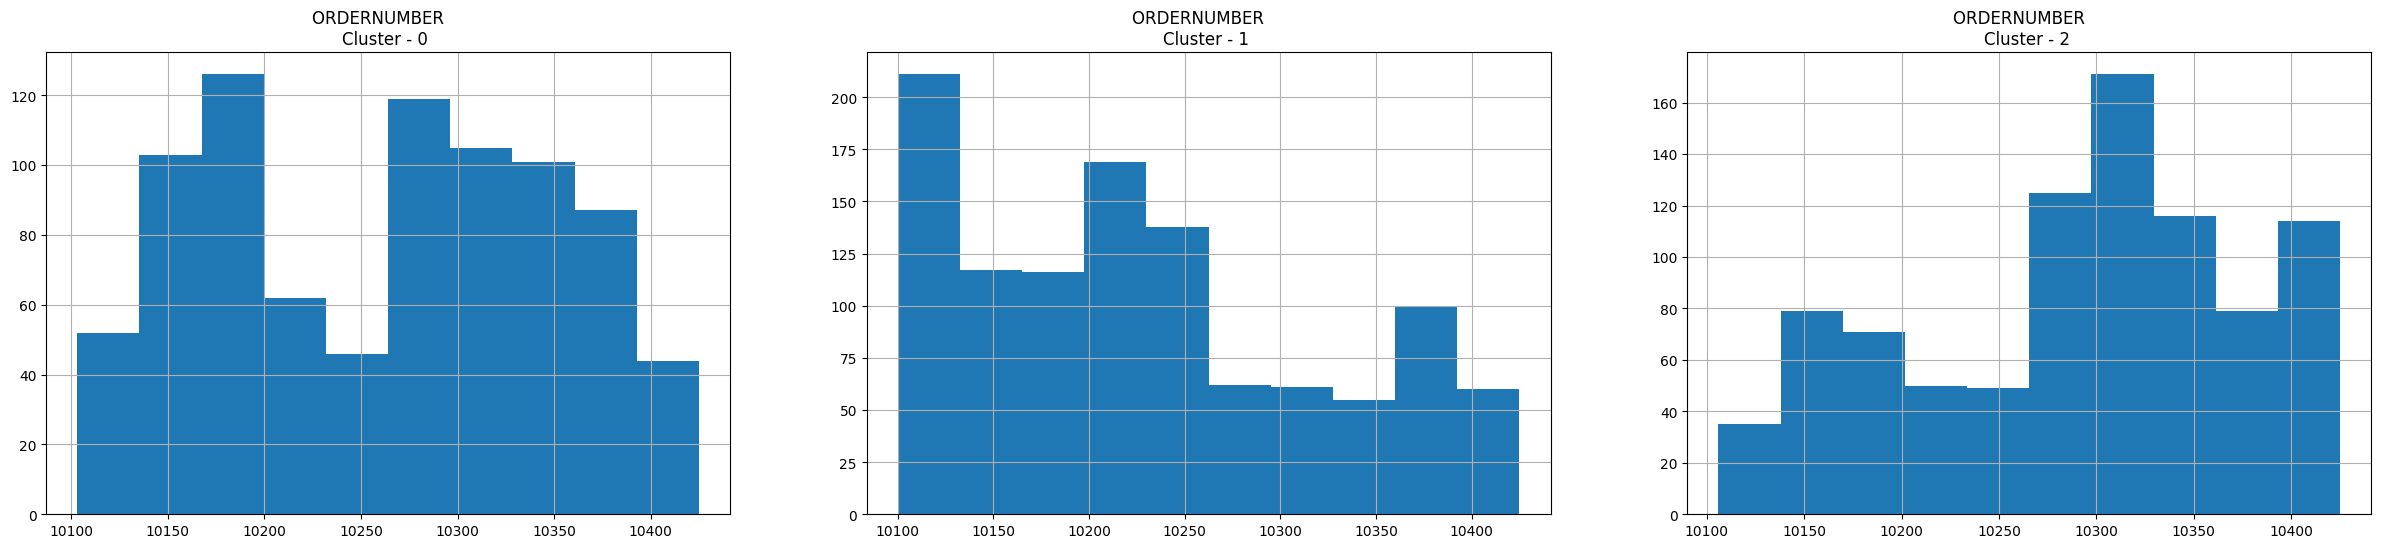

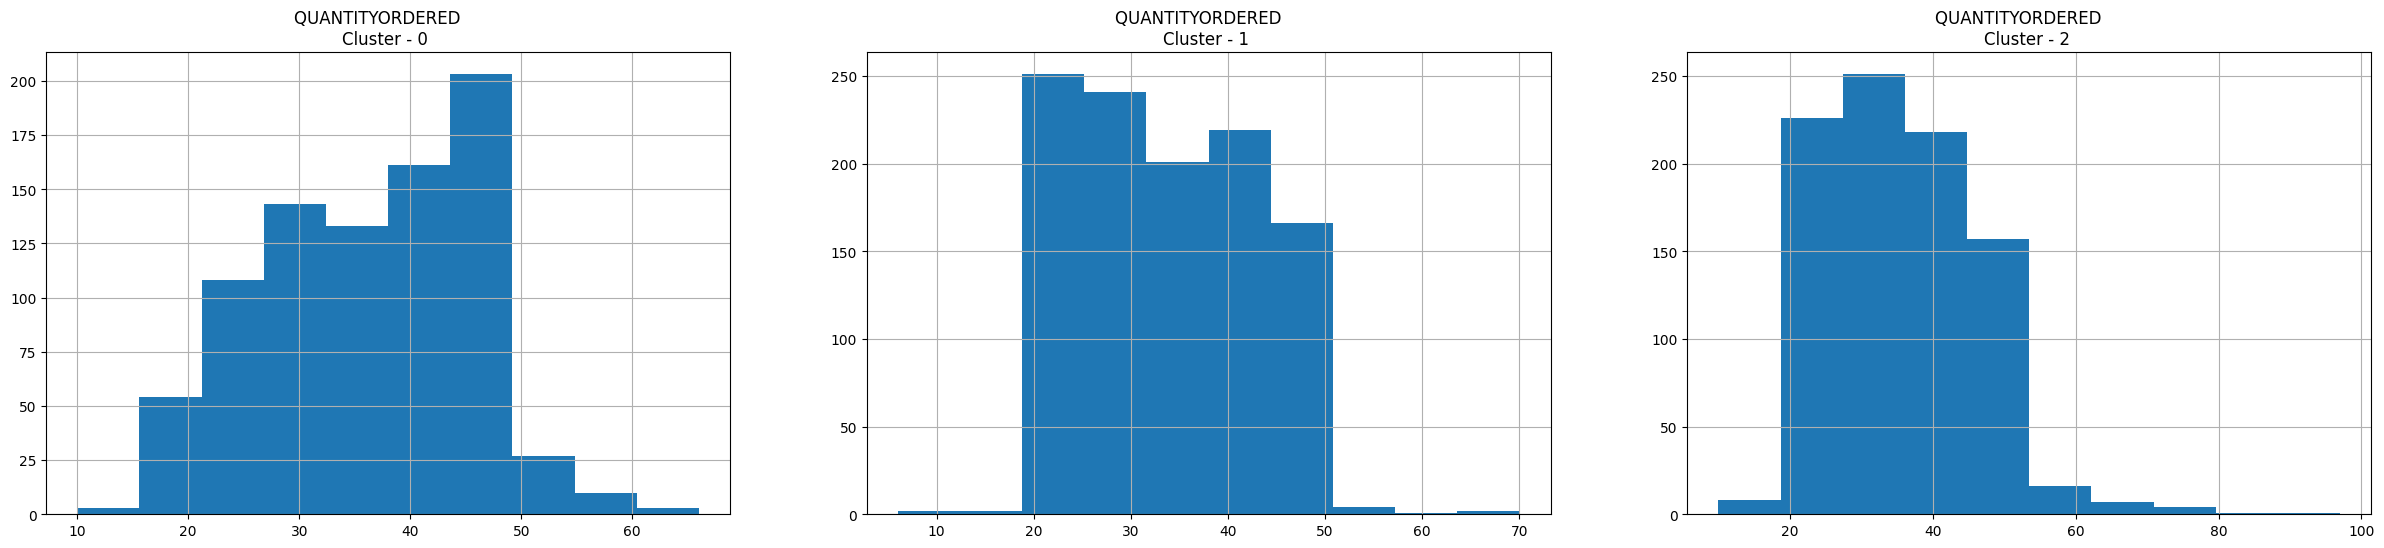

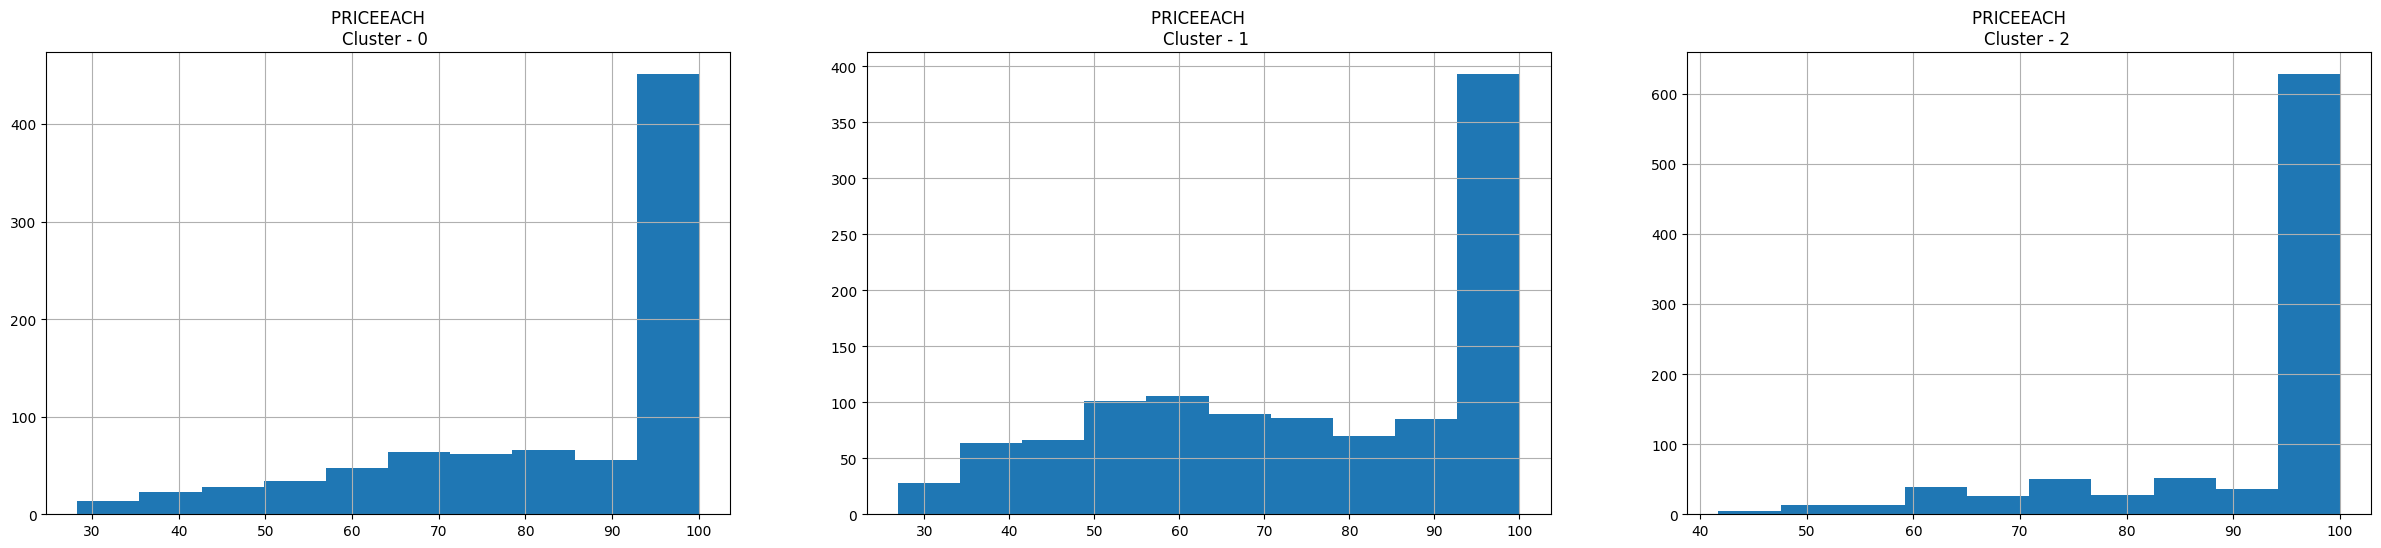

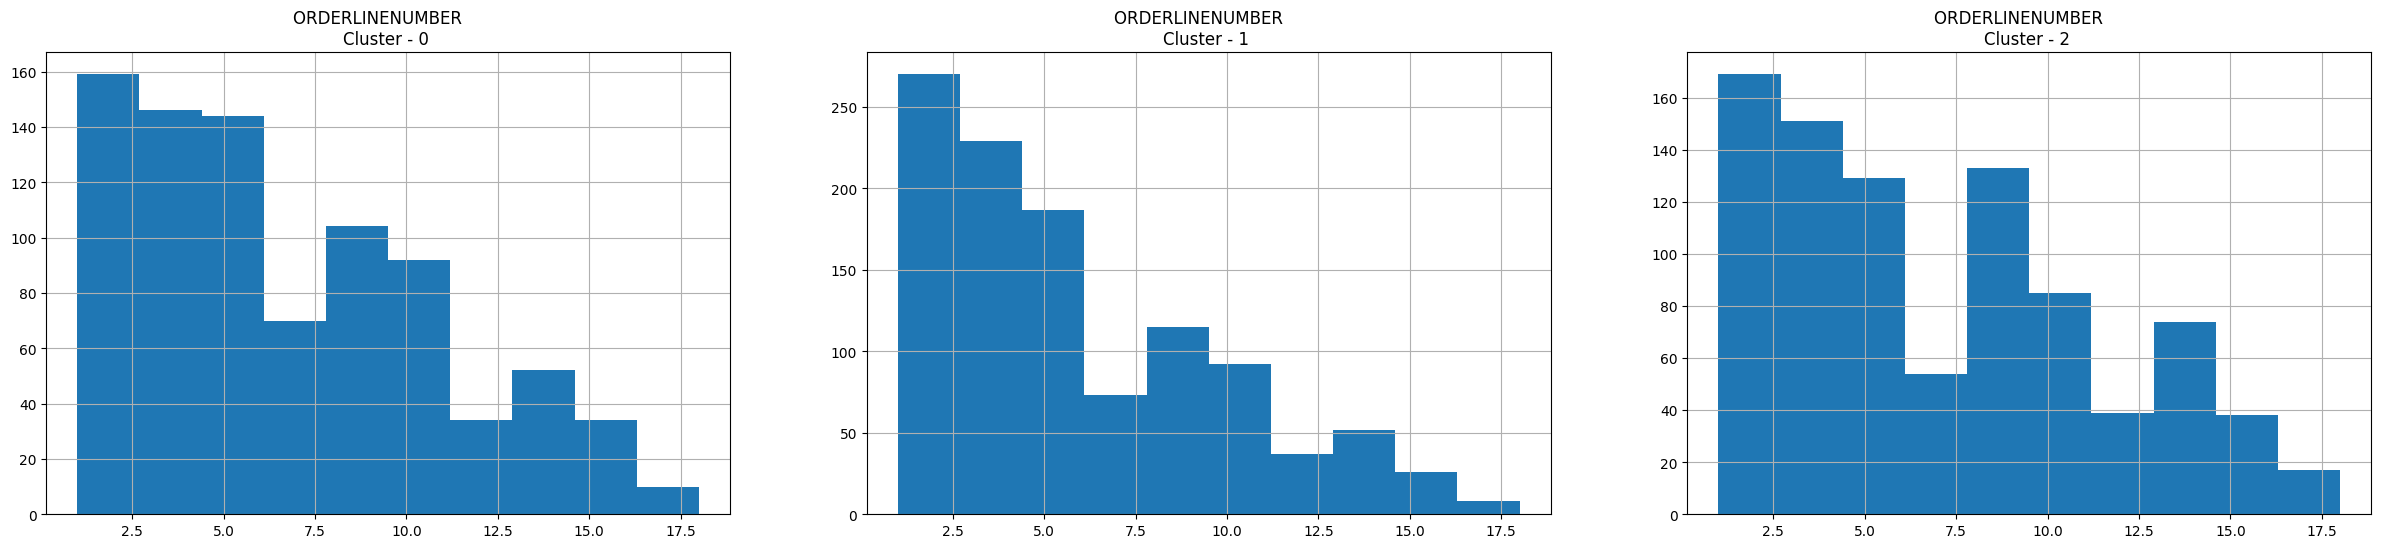

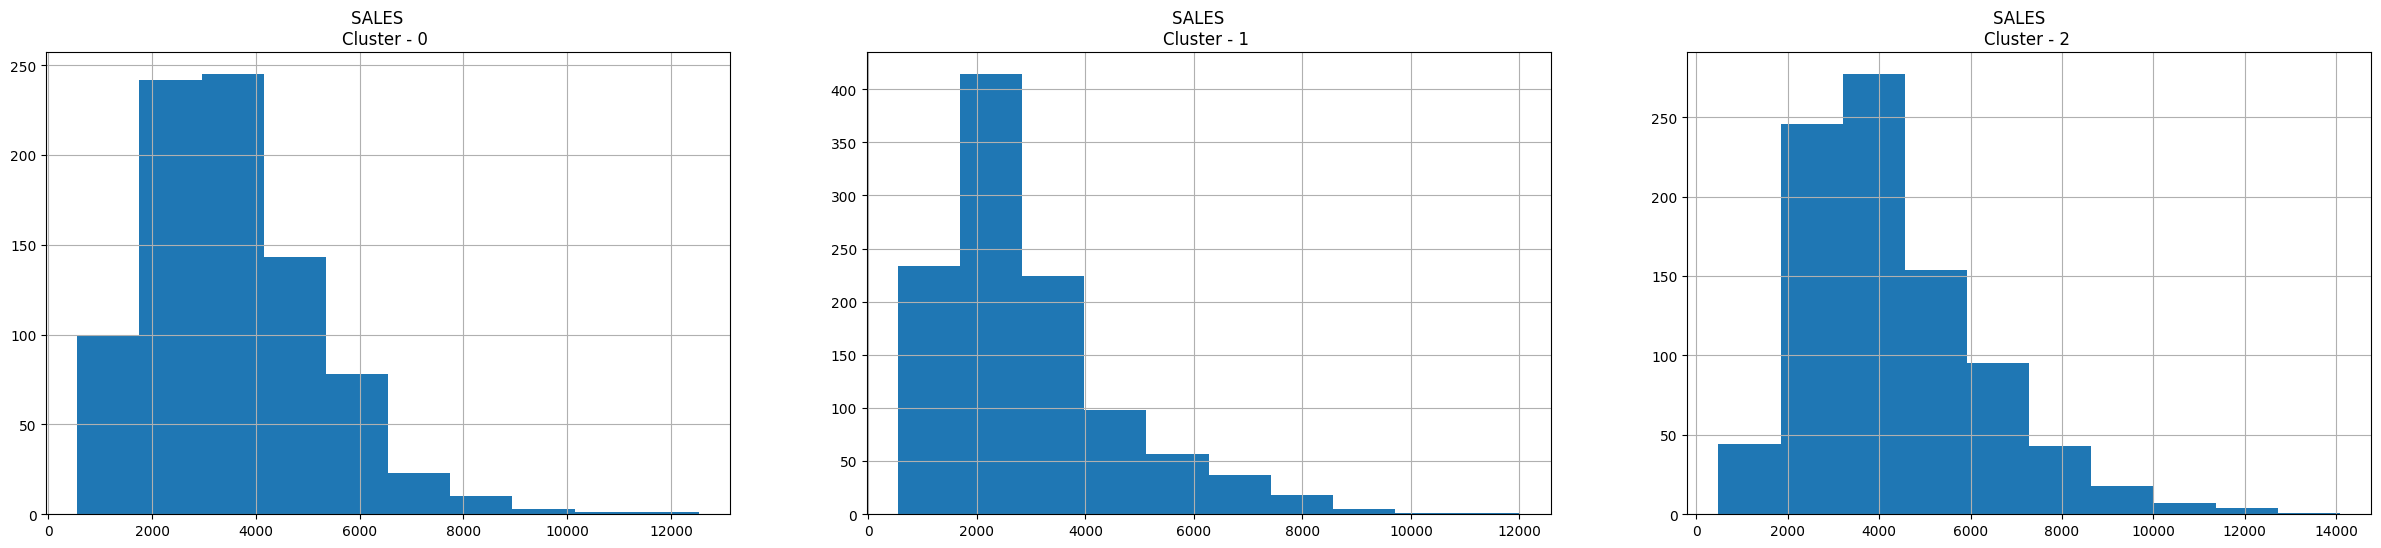

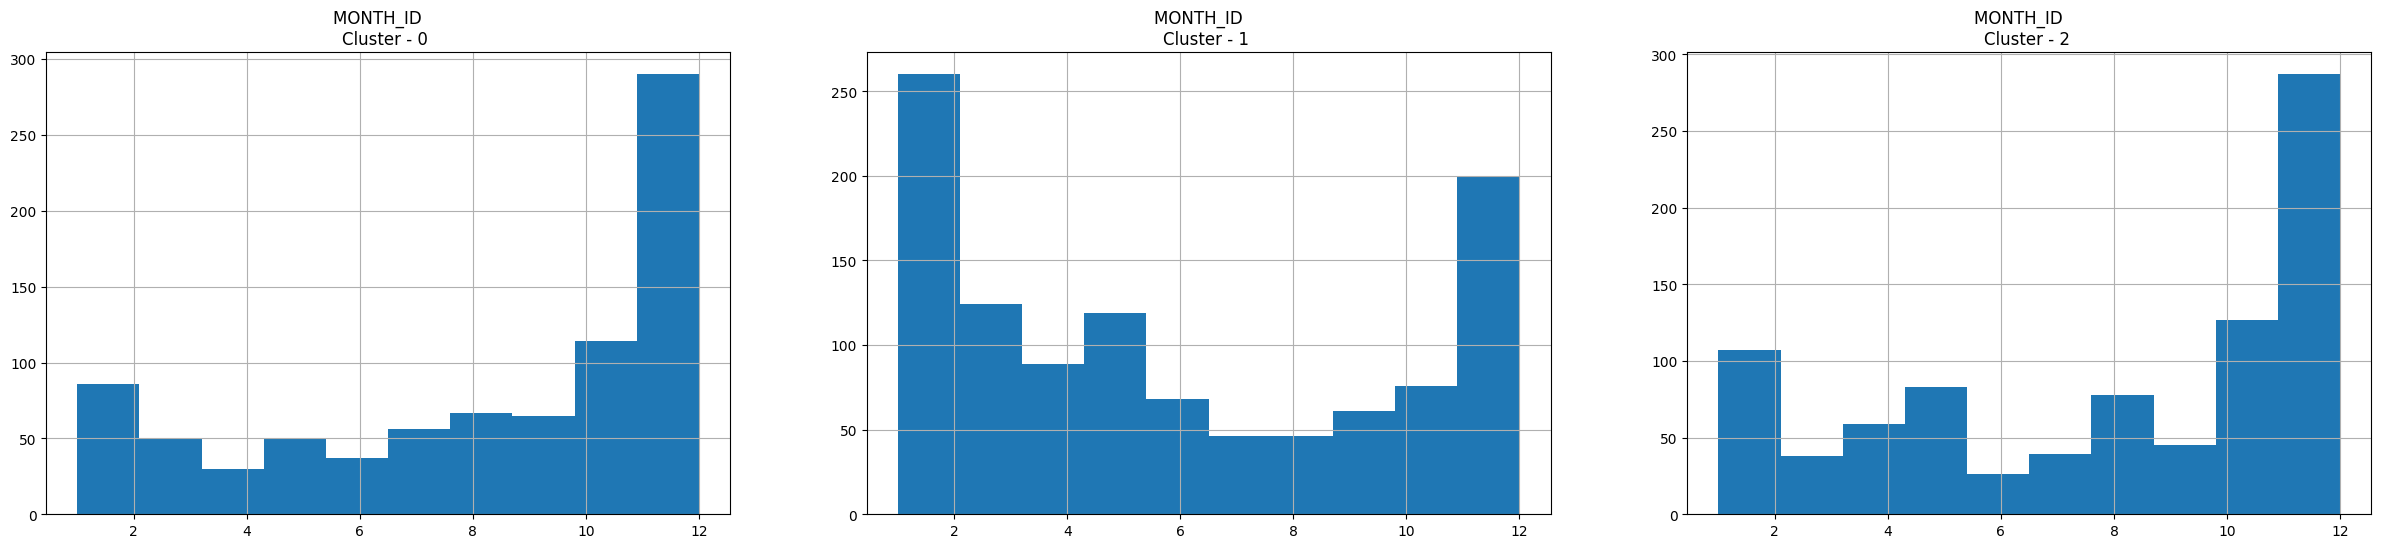

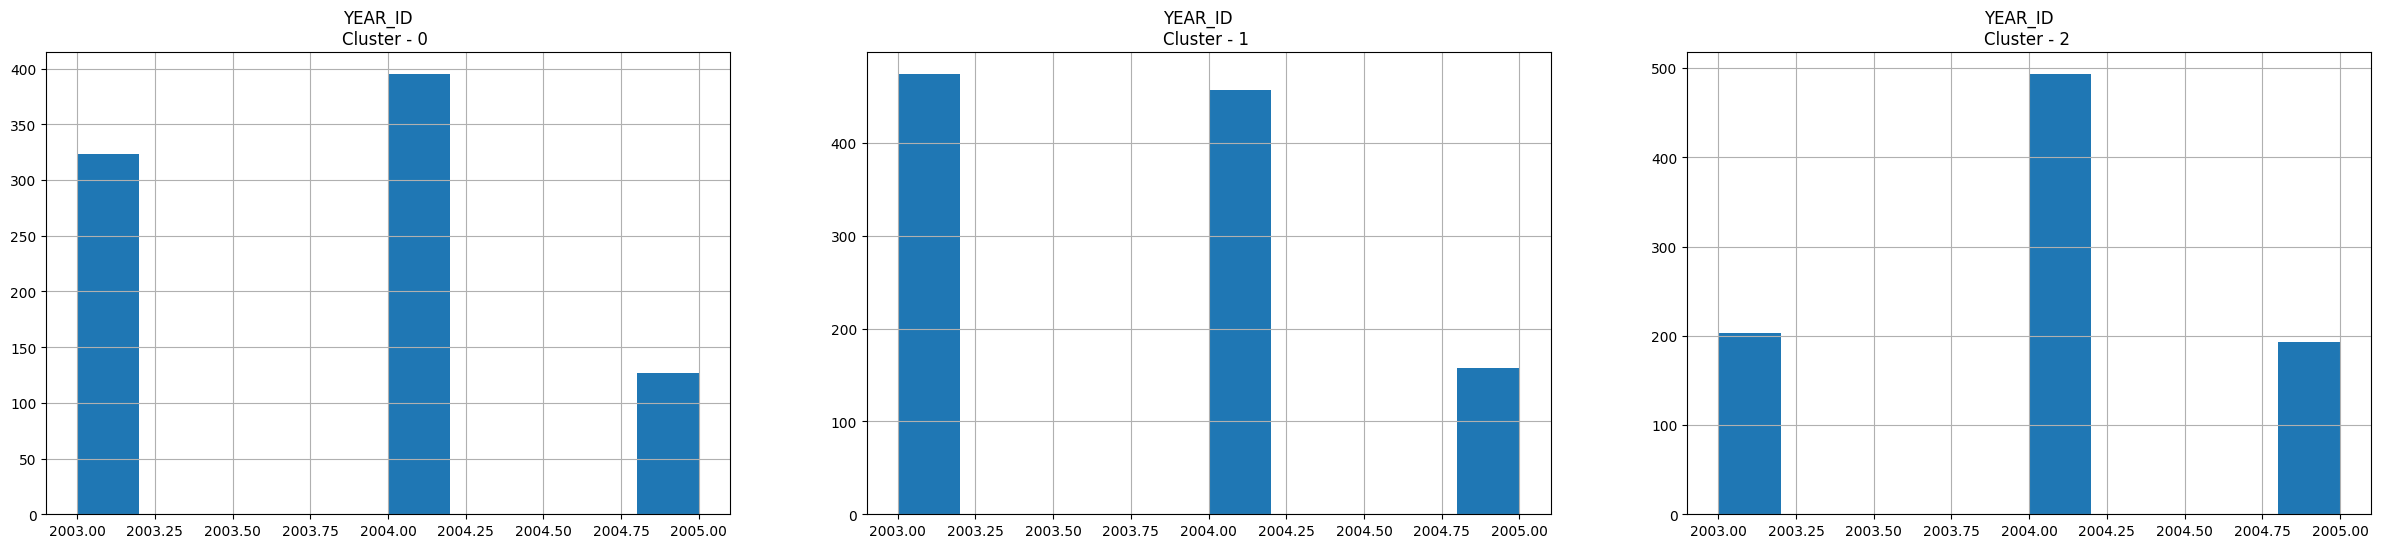

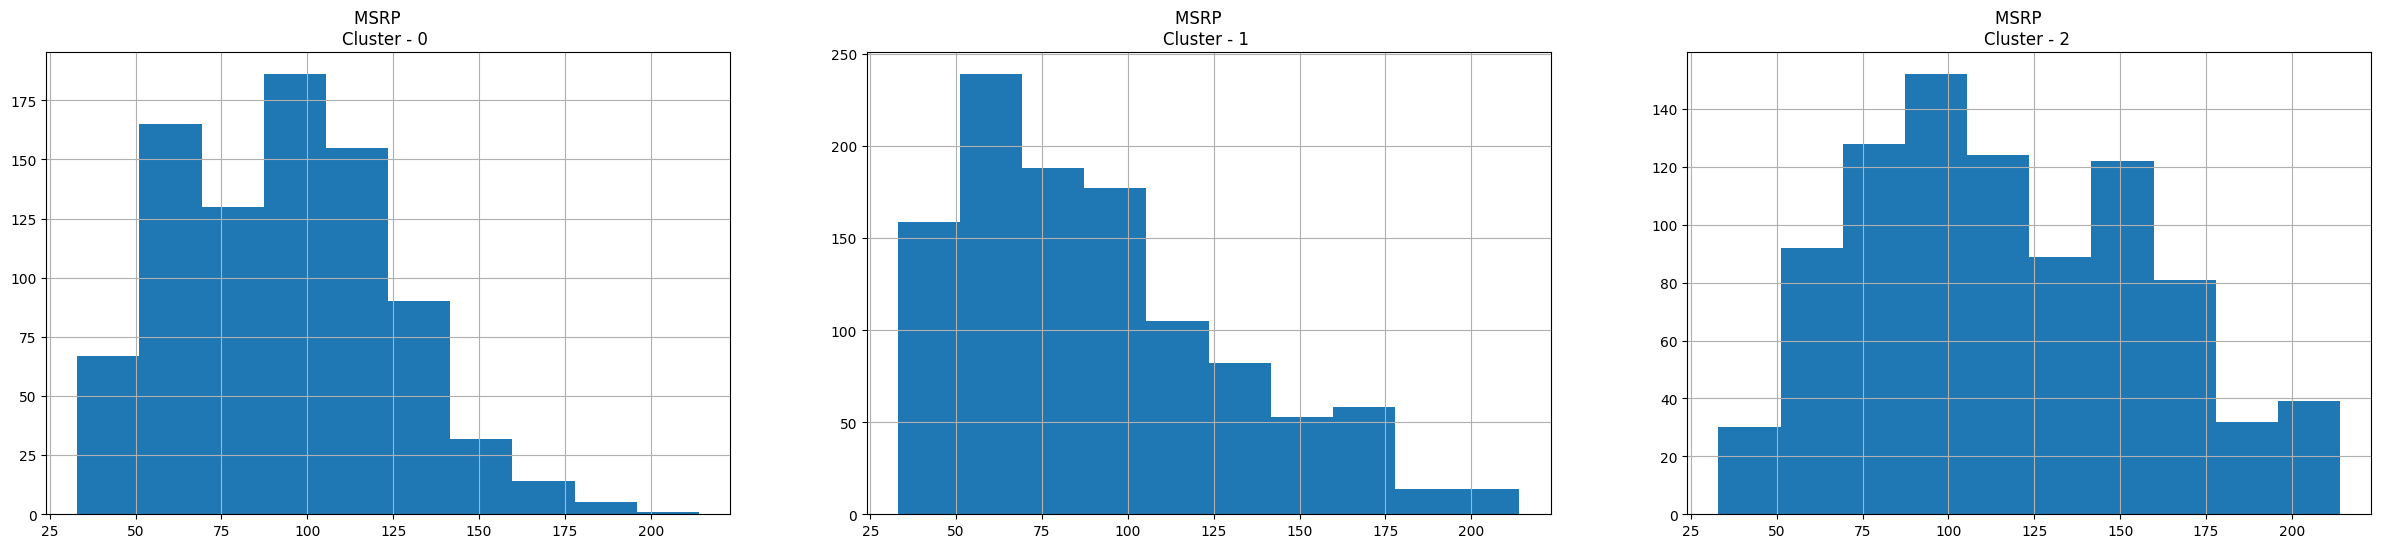

In [ ]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))

  plt.show()


In [ ]:
#cluster 0 - this group represents customers who buy items in high quantity(47), they usually buy items with high prices(99).

- cluster 0 - this group represents customers who buy items in high quantity(47), they usually buy items with high prices(99).
They bring-in more sales than other clusters. They are mostly active through out the year. They usually buy products corresponding to product code 10-90. They buy products with high msrp(158).

- Cluster 1 - this group represents customers who buy item in high quantity(37), and they buy tend to buy high price items(95). They bring-in average sales(4398) and they are active all around the year. They are the highest buyers of products corresponding code 0-10 and 90-100. Also they prefer to buy products with high msrp(115)

- Cluster 2 - This group represents customers who buy items in small quantity(30), they tend to buy low price items(69). They correspond to the lowest total sale(2061) and they are active all around the year.They are the highest buyers of products corresponding to product code 0-20 and 100-110  they then to buy products with low MSRP(77).





In [ ]:
#reduce the original data to 3 dimension using PCA for visualize the clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df
#

,pca1,pca2,pca3
0,0.588592,-0.130324,0.806807
1,0.675697,0.099447,-0.242988
2,-0.655877,-0.279860,-0.349348
3,-0.647106,-0.496012,0.740797
4,-0.719257,-0.491703,0.754121
...,...,...,...
2818,0.820578,-0.016808,-0.541804
2819,-0.473499,-0.468157,-0.685543
2820,-0.487450,-0.445405,-0.867911
2821,0.953868,-0.075827,-0.698922


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,0.588592,-0.130324,0.806807,1
1,0.675697,0.099447,-0.242988,1
2,-0.655877,-0.279860,-0.349348,1
3,-0.647106,-0.496012,0.740797,0
4,-0.719257,-0.491703,0.754121,2


In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
              color='cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))